<img align="left" src = https://dirac.astro.washington.edu/wp-content/uploads/2022/03/DIRAC_logo-purple-text_transparent-bckg_ALPHA-1-1.png
 width=190 style="padding: 10px">
<br><b>Introduction to the DP0.3 Moving Object Catalogs</b> <br>
Contact author: Bob Abel <br>
Last verified to run: 2023-06-17 <br>
LSST Science Piplines version: Weekly 2023_21 <br>
Container size: medium <br>
Targeted learning level: beginner <br>
<br>
<figcaption align = "left"><b>&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;DiRAC Institute</b></figcaption>


**Description:** DP0.3 moving object catalogs are examined.<br>**Skills:** Discover moving object catalogs and create plots for preliminary analysis. <br>**LSST Data Products:** TAP dp03_catalogs <br>**Credits:** Mario Jurić and literally every single contributing author to the Rubin Stack Club, DP0 Tutorial, and Delegate Contribution <br>&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Jupyter Notebooks, and Jake Vanderplas.


## <span style='color:blue'> Table of Contents </span>
### <span style='color:blue'> 1. Import Modules<br>2. Examine Schemas<br>3. MPCORB<br>4. SSObject<br>5. SSSource<br>6. DiaSource</span>

### <span style='color:blue'> 1. Import Modules</span>
#### <span style='color:blue'> Import the data as "ssotap" instead of "tap".</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

from lsst.rsp import get_tap_service, retrieve_query

service = get_tap_service("ssotap")

### <span style='color:blue'> 2. What are the Moving Object schemas? </span>

In [2]:
query = "SELECT * FROM tap_schema.schemas"
results = service.search(query)
print(type(results))

<class 'pyvo.dal.tap.TAPResults'>


In [3]:
results = service.search(query).to_table().to_pandas()
results

,description,schema_index,schema_name,utype
0,Data Preview 0.3 contains the catalog products...,0,dp03_catalogs,
1,A TAP-standard-mandated schema to describe tab...,100000,tap_schema,
2,UWS Metadata,120000,uws,


### <span style='color:blue'> What's in the DP0.3 catalogs? </span>

In [4]:
schema_names = results['schema_name']
for name in schema_names:
    if name.find('dp03') > -1:
        dp03_schema_name = name
        break
print("DP0.3 schema is " + dp03_schema_name)

DP0.3 schema is dp03_catalogs


In [5]:
query = "SELECT * FROM tap_schema.tables " \
        "WHERE tap_schema.tables.schema_name = '" \
        + dp03_schema_name + "' order by table_index ASC"
print(query)

results = service.search(query)
results = results.to_table()
results

SELECT * FROM tap_schema.tables WHERE tap_schema.tables.schema_name = 'dp03_catalogs' order by table_index ASC


description,schema_name,table_index,table_name,table_type,utype
str512,str512,int32,str64,str8,str512
The orbit catalog produced by the Minor Planet Center. Ingested daily. O(10M) rows by survey end. The columns are described at https://minorplanetcenter.net//iau/info/MPOrbitFormat.html,dp03_catalogs,0,dp03_catalogs.MPCORB,table,
"LSST-computed per-object quantities. 1:1 relationship with MPCORB. Recomputed daily, upon MPCORB ingestion.",dp03_catalogs,0,dp03_catalogs.SSObject,table,
"LSST-computed per-source quantities. 1:1 relationship with DIASource. Recomputed daily, upon MPCORB ingestion.",dp03_catalogs,0,dp03_catalogs.SSSource,table,
Table to store 'difference image sources'; - sources detected at SNR >=5 on difference images.,dp03_catalogs,0,dp03_catalogs.DiaSource,table,


## <span style='color:blue'> 3. What's in the MPCORB catalog and how big is it?</span>

In [6]:
results = service.search("SELECT COUNT(*) from dp03_catalogs.MPCORB")
results.to_table().to_pandas()

,COUNT
0,14600302


In [7]:
df = service.search("SELECT TOP 10000 * FROM dp03_catalogs.MPCORB").to_table().to_pandas()
df

,arc,arcEnd,arcStart,computer,e,epoch,flags,fullDesignation,incl,lastIncludedObservation,...,nopp,peri,pertsLong,pertsShort,q,reference,rms,ssObjectId,tperi,uncertaintyParameter
0,NaN,,,,0.56904,54800.0,0,2011 SR000001,5.01607,NaN,...,0,47.02487,,,7.88721,,NaN,-2658575675934308610,52354.06796,
1,NaN,,,,0.07272,54800.0,0,2011 SR000002,12.20203,NaN,...,0,111.14332,,,7.90048,,NaN,1638696702905544284,54255.95952,
2,NaN,,,,0.25853,54800.0,0,2011 SR000003,16.23096,NaN,...,0,86.93460,,,18.93842,,NaN,-6148727610239885338,32718.27775,
3,NaN,,,,0.16372,54800.0,0,2011 SR000004,10.94138,NaN,...,0,357.05184,,,8.90149,,NaN,2476339031007217136,49162.23730,
4,NaN,,,,0.35683,54800.0,0,2011 SR000006,18.91729,NaN,...,0,302.03901,,,14.56498,,NaN,-6439077407999146266,-13278.77515,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,,,,0.57394,54800.0,0,2011 SR0004MM,13.11296,NaN,...,0,115.22961,,,9.28789,,NaN,-8734882002694245648,-16697.67576,
9996,NaN,,,,0.57404,54800.0,0,2011 SR0004MO,20.98103,NaN,...,0,112.77882,,,11.86160,,NaN,-4671966915883840289,51925.05797,
9997,NaN,,,,0.62747,54800.0,0,2011 SR0004MQ,13.96506,NaN,...,0,281.83500,,,6.75318,,NaN,5024477766334967041,1766.18754,
9998,NaN,,,,0.38713,54800.0,0,2011 SR0004MR,3.00973,NaN,...,0,275.32749,,,6.28335,,NaN,6391222850886637740,31782.45407,


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   arc                      0 non-null      float32
 1   arcEnd                   10000 non-null  object 
 2   arcStart                 10000 non-null  object 
 3   computer                 10000 non-null  object 
 4   e                        10000 non-null  float64
 5   epoch                    10000 non-null  float64
 6   flags                    10000 non-null  int32  
 7   fullDesignation          10000 non-null  object 
 8   incl                     10000 non-null  float64
 9   lastIncludedObservation  0 non-null      float32
 10  mpcDesignation           10000 non-null  object 
 11  mpcG                     10000 non-null  float32
 12  mpcH                     10000 non-null  float32
 13  mpcNumber                10000 non-null  int32  
 14  n                      

### <span style='color:blue'> Drop the "arc", "lastIncludedObservation:, "n" and "q" columns, since they are all null. </span>

In [9]:
df = df.drop(columns=['arc', 'lastIncludedObservation', 'n', 'q'])

In [10]:
df.columns

Index(['arcEnd', 'arcStart', 'computer', 'e', 'epoch', 'flags',
       'fullDesignation', 'incl', 'mpcDesignation', 'mpcG', 'mpcH',
       'mpcNumber', 'nobs', 'node', 'nopp', 'peri', 'pertsLong', 'pertsShort',
       'reference', 'rms', 'ssObjectId', 'tperi', 'uncertaintyParameter'],
      dtype='object')

### <span style='color:blue'> arcStart, arcEnd, computer, mpcG, mpCH pertsLong and pertsShort appear to be all ' ', nobs, nopp appear to all be zero. It looks like rms is all 'nan'. </span>

Text(0.5, 0.98, 'Some MPCORB Histograms')

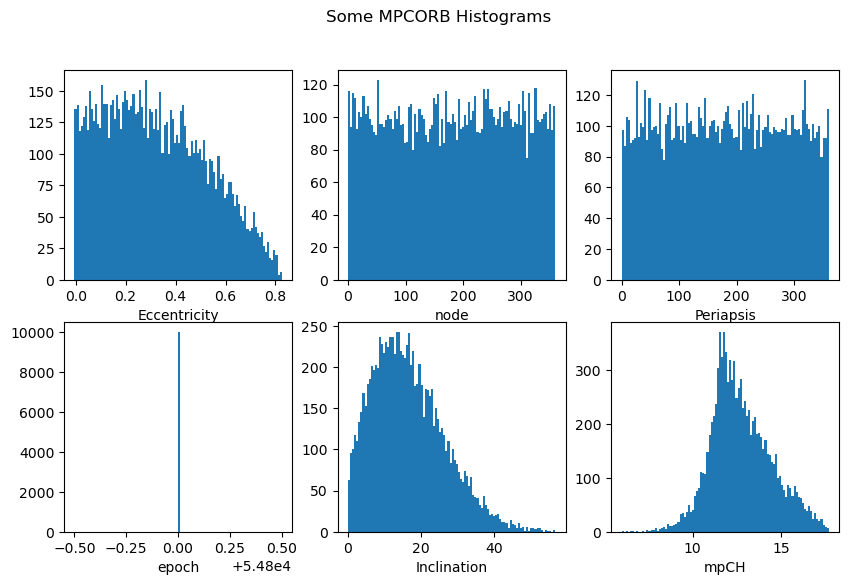

In [11]:
# e, epoch, incl, node, peri, rms

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax[0,0].hist(df['e'], bins=100)
ax[0,0].set_xlabel('Eccentricity')
ax[0,1].hist(df['node'], bins=100)
ax[0,1].set_xlabel('node')
ax[0,2].hist(df['peri'], bins=100)
ax[0,2].set_xlabel('Periapsis')
ax[1,0].hist(df['epoch'], bins=100)
ax[1,0].set_xlabel('epoch')
ax[1,1].hist(df['incl'], bins=100)
ax[1,1].set_xlabel('Inclination')
ax[1,2].hist(df['mpcH'], bins=100)
ax[1,2].set_xlabel('mpCH')
fig.suptitle('Some MPCORB Histograms')


Text(0, 0.5, 'mpcH')

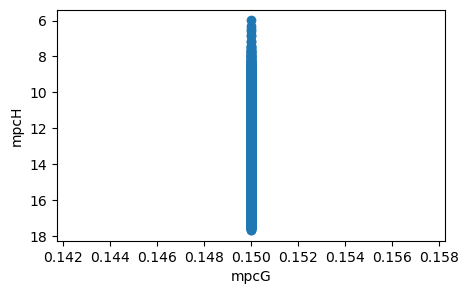

In [12]:
plt.figure(figsize=(5,3))
plt.scatter(df['mpcG'], df['mpcH'])
plt.gca().invert_yaxis()
plt.xlabel('mpcG')
plt.ylabel('mpcH')

Text(0.5, 0.98, 'Eccentricity, Node and Inclination')

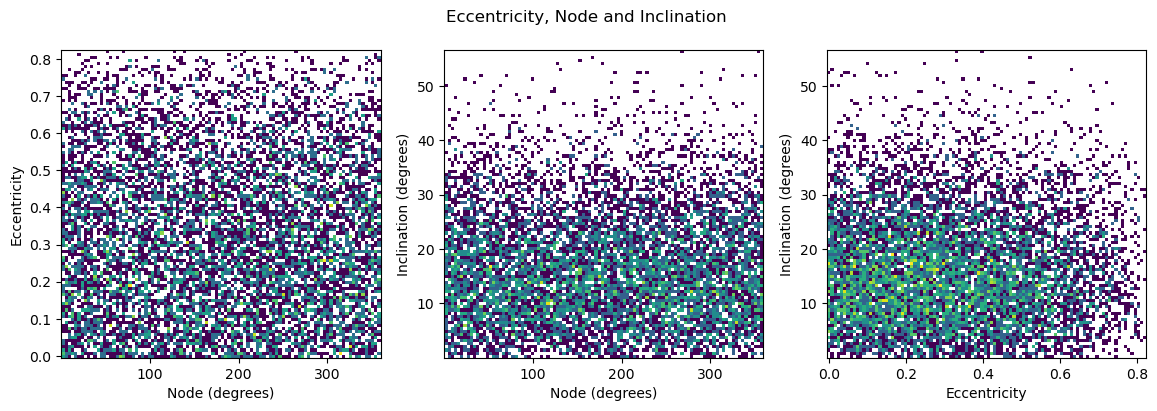

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))
ax[0].hist2d(df['node'], df['e'], bins=100, norm='log')
ax[0].set_xlabel('Node (degrees)')
ax[0].set_ylabel('Eccentricity')
ax[1].hist2d(df['node'], df['incl'], bins=100, norm='log')
ax[1].set_xlabel('Node (degrees)')
ax[1].set_ylabel('Inclination (degrees)')
ax[2].hist2d(df['e'], df['incl'], bins=100, norm='log')
ax[2].set_xlabel('Eccentricity')
ax[2].set_ylabel('Inclination (degrees)')
fig.suptitle("Eccentricity, Node and Inclination")

## <span style='color:blue'> 4. What's in the SSObject catalog and how big is it?</span>

In [14]:
results = service.search("SELECT COUNT(*) from dp03_catalogs.SSObject")
results.to_table().to_pandas()

,COUNT
0,10222593


In [15]:
df = service.search("SELECT TOP 10000 * FROM dp03_catalogs.SSObject").to_table().to_pandas()
df

,arc,discoverySubmissionDate,firstObservationDate,flags,gChi2,gG12,gG12Err,gH,gH_gG12_Cov,gHErr,...,yH_yG12_Cov,yHErr,yNdata,zChi2,zG12,zG12Err,zH,zH_zG12_Cov,zHErr,zNdata
0,23.970633,63485.235127,63478.235127,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,592.858276,63130.249928,63123.249928,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3578.774902,60231.320624,60224.320624,0,1.110242,0.180097,0.057263,20.742580,0.002843,0.054457,...,NaN,NaN,0,0.233795,0.210068,0.030876,19.977598,0.000846,0.030486,11
3,27.848423,61395.336431,61388.336431,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.000000,61181.280962,61174.280962,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2656.853271,60679.266150,60672.266150,0,1.638247,0.416311,0.301014,21.954044,0.035673,0.138750,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,2280.793701,60443.353240,60436.353240,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,3297.790527,60229.288561,60222.288561,0,0.941097,0.116326,0.011919,18.290657,0.000149,0.013157,...,0.001369,0.037019,32,1.505396,0.162155,0.032137,17.734968,0.000974,0.031842,55
9998,3340.827393,60413.387635,60406.387635,0,1.294289,1.115785,0.943503,20.897684,0.370902,0.398333,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   arc                      10000 non-null  float32
 1   discoverySubmissionDate  10000 non-null  float64
 2   firstObservationDate     10000 non-null  float64
 3   flags                    10000 non-null  int64  
 4   gChi2                    4685 non-null   float32
 5   gG12                     4685 non-null   float32
 6   gG12Err                  4685 non-null   float32
 7   gH                       4685 non-null   float32
 8   gH_gG12_Cov              4685 non-null   float32
 9   gHErr                    4685 non-null   float32
 10  gNdata                   10000 non-null  int32  
 11  iChi2                    5061 non-null   float32
 12  iG12                     5061 non-null   float32
 13  iG12Err                  5061 non-null   float32
 14  iH                     

In [17]:
# Drop nan Columns:

print('Number of rows before dropping all rows with NaNs: %d' %len(df))
df = df.dropna()
print('Number of rows after dropping all rows with NaNs: %d' %len(df))


Number of rows before dropping all rows with NaNs: 10000
Number of rows after dropping all rows with NaNs: 960


In [18]:
print(len(df))
df = df.dropna()
print(len(df))
df.reset_index()

960
960


,index,arc,discoverySubmissionDate,firstObservationDate,flags,gChi2,gG12,gG12Err,gH,gH_gG12_Cov,...,yH_yG12_Cov,yHErr,yNdata,zChi2,zG12,zG12Err,zH,zH_zG12_Cov,zHErr,zNdata
0,11,3426.781738,60381.347436,60374.347436,0,0.744022,0.161918,0.014414,18.332722,0.000113,...,0.001446,0.028723,38,1.006063,0.218915,0.028447,17.779135,0.000479,0.018848,87
1,20,3391.607666,60329.363118,60322.363118,0,1.545100,0.141859,0.021957,17.520332,0.000414,...,0.005180,0.061410,20,0.830705,0.187060,0.030160,16.965273,0.000652,0.023244,49
2,22,3379.635498,60435.427925,60428.427925,0,1.659221,0.146537,0.006197,15.691534,0.000024,...,0.000087,0.008216,103,1.537985,0.151883,0.005703,14.903973,0.000023,0.004429,99
3,25,3302.609863,60417.416868,60410.416868,0,1.326712,0.131639,0.003136,16.579573,0.000011,...,0.000013,0.003780,44,1.137314,0.128669,0.002602,15.781694,0.000008,0.003050,55
4,42,3498.770020,60234.197159,60227.197159,0,1.415306,0.137497,0.014105,17.767820,0.000149,...,0.000265,0.015157,78,1.028455,0.120799,0.013204,16.940821,0.000137,0.011136,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,9936,3592.135498,60226.059416,60219.059416,0,1.767395,0.162699,0.005560,15.707813,0.000023,...,0.000096,0.008887,63,1.160422,0.139681,0.006639,14.890952,0.000033,0.005322,78
956,9939,2711.893555,61043.111822,61036.111822,0,1.209709,0.142608,0.004350,15.589643,0.000017,...,0.000192,0.013914,60,1.114973,0.134745,0.008501,14.789541,0.000065,0.007980,65
957,9967,3393.615479,60398.366217,60391.366217,0,2.724931,0.185672,0.008904,16.741154,0.000042,...,0.000307,0.016078,90,0.875689,0.151696,0.010717,16.119276,0.000080,0.008165,91
958,9992,3231.861572,60337.369490,60330.369490,0,8.608109,0.141855,0.004271,15.360290,0.000015,...,0.000005,0.002215,72,1.379135,0.133668,0.001967,14.555643,0.000004,0.002085,66


In [19]:
# Calculate colors

df['ug'] = df['uH'] - df['gH']
df['gr'] = df['gH'] - df['rH']
df['ri'] = df['rH'] - df['iH']
df['iz'] = df['iH'] - df['zH']
df['zy'] = df['zH'] - df['yH']


Text(0.5, 0.98, 'Color-Color Plots for SSObject Catalog')

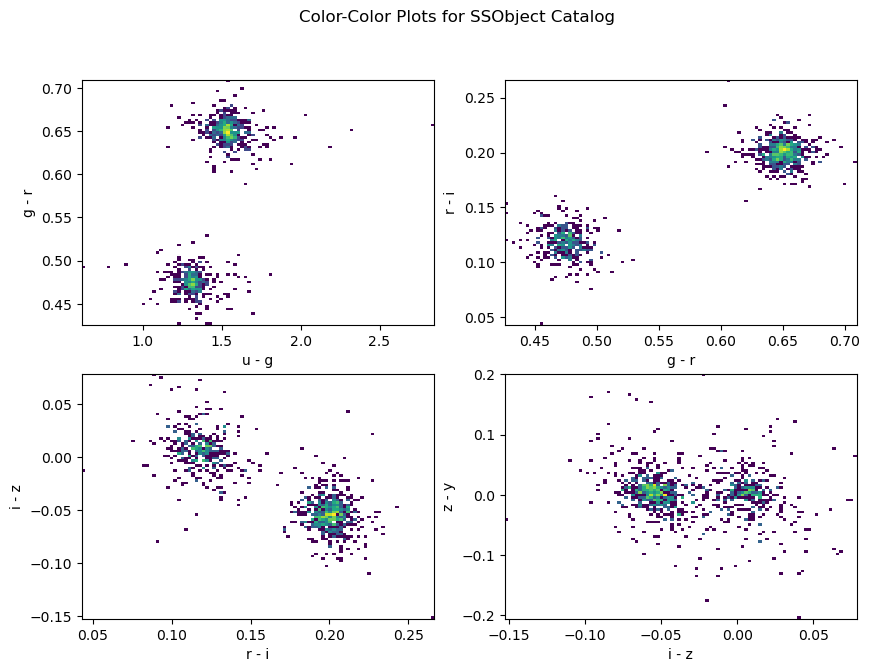

In [20]:
colors = ['ug', 'gr', 'ri', 'iz', 'zy']
filters = ['u', 'g', 'r', 'i', 'z', 'i']
fig, ax = plt.subplots(2, 2, figsize=(10,7))
m = 0
ax[0, 0].hist2d(df['ug'], df['gr'], bins=100, norm='log')
ax[0, 0].set_xlabel('u - g')
ax[0, 0].set_ylabel('g - r')
ax[0, 1].hist2d(df['gr'], df['ri'], bins=100, norm='log')
ax[0, 1].set_xlabel('g - r')
ax[0, 1].set_ylabel('r - i')
ax[1, 0].hist2d(df['ri'], df['iz'], bins=100, norm='log')
ax[1, 0].set_xlabel('r - i')
ax[1, 0].set_ylabel('i - z')
ax[1, 1].hist2d(df['iz'], df['zy'], bins=100, norm='log')
ax[1, 1].set_xlabel('i - z')
ax[1, 1].set_ylabel('z - y')
fig.suptitle('Color-Color Plots for SSObject Catalog')


In [21]:
df.columns

Index(['arc', 'discoverySubmissionDate', 'firstObservationDate', 'flags',
       'gChi2', 'gG12', 'gG12Err', 'gH', 'gH_gG12_Cov', 'gHErr', 'gNdata',
       'iChi2', 'iG12', 'iG12Err', 'iH', 'iH_iG12_Cov', 'iHErr', 'iNdata',
       'maxExtendedness', 'medianExtendedness', 'minExtendedness', 'MOID',
       'MOIDDeltaV', 'MOIDEclipticLongitude', 'MOIDTrueAnomaly', 'numObs',
       'rChi2', 'rG12', 'rG12Err', 'rH', 'rH_rG12_Cov', 'rHErr', 'rNdata',
       'ssObjectId', 'uChi2', 'uG12', 'uG12Err', 'uH', 'uH_uG12_Cov', 'uHErr',
       'uNdata', 'yChi2', 'yG12', 'yG12Err', 'yH', 'yH_yG12_Cov', 'yHErr',
       'yNdata', 'zChi2', 'zG12', 'zG12Err', 'zH', 'zH_zG12_Cov', 'zHErr',
       'zNdata', 'ug', 'gr', 'ri', 'iz', 'zy'],
      dtype='object')

Text(0.5, 1.0, 'gHErr vs. gH')

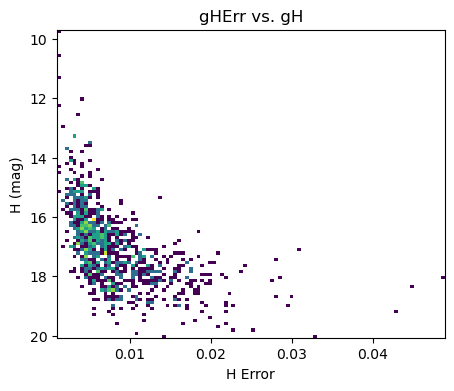

In [22]:
plt.figure(figsize=(5,4))
plt.hist2d(df['gHErr'], df['gH'], bins=100, norm='log')
plt.gca().invert_yaxis()
plt.xlabel('H Error')
plt.ylabel('H (mag)')
plt.title('gHErr vs. gH')

## <span style='color:blue'> 5. What's in the SSSource catalog and how big is it?</span>

In [23]:
results = service.search("SELECT COUNT(*) from dp03_catalogs.SSSource")
results.to_table().to_pandas()

,COUNT
0,1031389589


In [24]:
df = service.search("SELECT TOP 10000 * FROM dp03_catalogs.SSSource").to_table().to_pandas()
df

,diaSourceId,eclipticBeta,eclipticLambda,galacticB,galacticL,heliocentricDist,heliocentricVX,heliocentricVY,heliocentricVZ,heliocentricX,...,residualDec,residualRa,ssObjectId,topocentricDist,topocentricVX,topocentricVY,topocentricVZ,topocentricX,topocentricY,topocentricZ
0,-6677207320886083738,-14.796937,0.275643,-74.983697,97.325984,2.714209,0.001535,0.009362,0.004462,2.581631,...,NaN,NaN,3170741736075811932,1.903268,-0.010019,-0.002330,-0.000515,1.840129,0.201474,-0.442451
1,2187377420519878483,-14.798513,0.273838,-74.985298,97.319338,2.714179,0.001534,0.009363,0.004463,2.581669,...,NaN,NaN,3170741736075811932,1.903025,-0.009980,-0.002347,-0.000516,1.839880,0.201416,-0.442464
2,7710902302487823515,-8.514664,323.399988,-49.667501,30.663622,2.838660,0.006527,0.007276,0.001231,2.282524,...,NaN,NaN,-3138627559327309764,1.833599,-0.003113,-0.005791,-0.004332,1.455820,-0.883979,-0.679156
3,-271356953288323193,2.993032,223.464466,40.926764,341.729632,2.788173,0.009592,-0.004019,-0.003233,-1.211055,...,NaN,NaN,621582377523519051,2.833449,0.000118,-0.017048,-0.008906,-2.053715,-1.844714,-0.638527
4,-8697932825673254210,2.992054,223.471261,40.920805,341.734121,2.788179,0.009592,-0.004018,-0.003233,-1.210826,...,NaN,NaN,621582377523519051,2.833760,0.000117,-0.017085,-0.008907,-2.053713,-1.845121,-0.638740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2165369312305495559,-17.535232,293.050418,-28.256429,1.434944,2.598016,0.009718,0.002557,0.005756,1.461511,...,NaN,NaN,9114396845358474813,1.706799,-0.000227,-0.010260,0.000209,0.637228,-1.169420,-1.067502
9996,3878803426019511060,-7.039276,271.273407,-4.572098,0.882456,2.269883,0.011348,0.004711,0.003836,0.760745,...,NaN,NaN,315247795853964551,1.437760,-0.000518,-0.006713,-0.001055,0.031711,-1.238766,-0.729114
9997,-5636504962884249340,-7.036857,271.272760,-4.570348,0.884250,2.269839,0.011348,0.004712,0.003837,0.761016,...,NaN,NaN,315247795853964551,1.437911,-0.000491,-0.006742,-0.001056,0.031699,-1.238926,-0.729139
9998,2869090248556322883,0.674868,291.216392,-17.926442,17.898947,2.381575,0.008110,0.007178,0.003391,1.368240,...,NaN,NaN,2382345053514857016,1.475881,-0.001582,-0.005843,-0.002224,0.534071,-1.269142,-0.531291


Text(0.5, 1.0, 'heliocentricDist vs. topocentricDist')

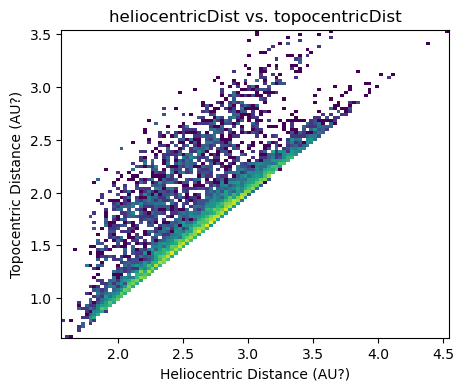

In [25]:
plt.figure(figsize=(5,4))
plt.hist2d(df['heliocentricDist'], df['topocentricDist'], bins=100, norm='log')
plt.xlabel('Heliocentric Distance (AU?)')
plt.ylabel('Topocentric Distance (AU?)')
plt.title('heliocentricDist vs. topocentricDist')

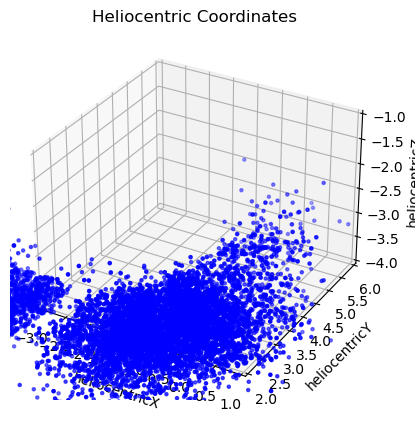

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['heliocentricX'], df['heliocentricY'], df['heliocentricZ'], c='blue', marker='.')

ax.set_xlabel('heliocentricX')
ax.set_ylabel('heliocentricY')
ax.set_zlabel('heliocentricZ')
ax.set_xlim(-3, 1)
ax.set_ylim(2, 6)
ax.set_zlim(-4, -1)
ax.set_title("Heliocentric Coordinates")
plt.show()


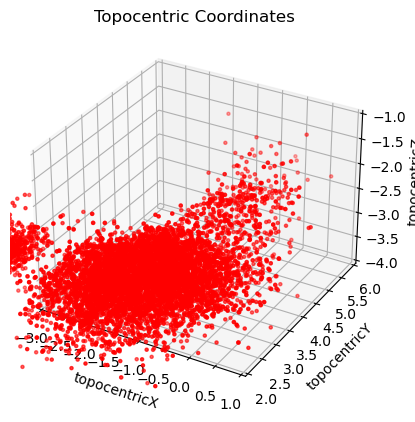

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['topocentricX'], df['topocentricY'], df['topocentricZ'], c='red', marker='.')

ax.set_xlabel('topocentricX')
ax.set_ylabel('topocentricY')
ax.set_zlabel('topocentricZ')
ax.set_xlim(-3, 1)
ax.set_ylim(2, 6)
ax.set_zlim(-4, -1)
ax.set_title("Topocentric Coordinates")
plt.show()


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diaSourceId              10000 non-null  int64  
 1   eclipticBeta             10000 non-null  float64
 2   eclipticLambda           10000 non-null  float64
 3   galacticB                10000 non-null  float64
 4   galacticL                10000 non-null  float64
 5   heliocentricDist         10000 non-null  float32
 6   heliocentricVX           10000 non-null  float32
 7   heliocentricVY           10000 non-null  float32
 8   heliocentricVZ           10000 non-null  float32
 9   heliocentricX            10000 non-null  float32
 10  heliocentricY            10000 non-null  float32
 11  heliocentricZ            10000 non-null  float32
 12  mpcUniqueId              10000 non-null  int64  
 13  phaseAngle               10000 non-null  float32
 14  predictedDecSigma      

Text(0, 0.5, 'Ecliptic β (deg)')

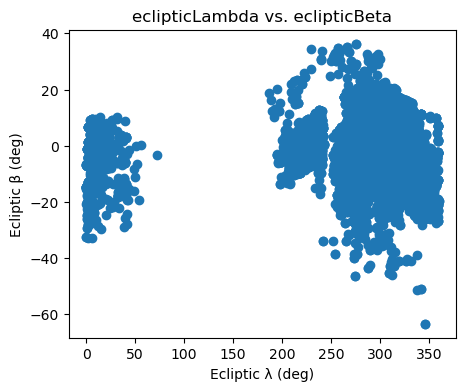

In [29]:
plt.figure(figsize=(5,4))
plt.scatter(df['eclipticLambda'], df['eclipticBeta'])
plt.title('eclipticLambda vs. eclipticBeta')
plt.xlabel('Ecliptic λ (deg)')
plt.ylabel('Ecliptic β (deg)')

Text(0, 0.5, 'Galactic Latitude (deg)')

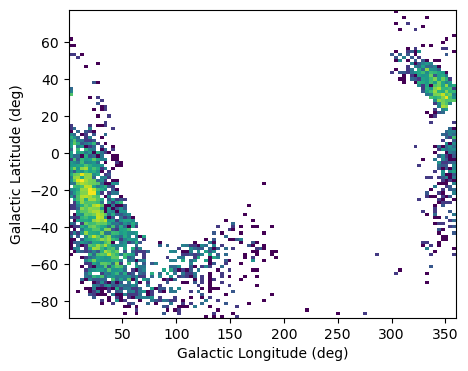

In [30]:
plt.figure(figsize=(5,4))
plt.hist2d(df['galacticL'], df['galacticB'], bins=100, norm='log')
plt.xlabel('Galactic Longitude (deg)')
plt.ylabel('Galactic Latitude (deg)')

## <span style='color:blue'> 6. What's in the DiaSource catalog and how big is it?</span>


In [31]:
results = service.search("SELECT COUNT(*) from dp03_catalogs.DiaSource")
results.to_table().to_pandas()

,COUNT
0,1031389589


In [32]:
df = service.search("SELECT TOP 10000 * FROM dp03_catalogs.DiaSource").to_table().to_pandas()


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _decTrue             10000 non-null  float64
 1   _magTrue             10000 non-null  float32
 2   _name                10000 non-null  object 
 3   _raTrue              10000 non-null  float64
 4   _V                   10000 non-null  float32
 5   ccdVisitId           10000 non-null  int64  
 6   decl                 10000 non-null  float64
 7   declSigma            10000 non-null  float32
 8   diaObjectId          10000 non-null  int64  
 9   diaSourceId          10000 non-null  int64  
 10  filter               10000 non-null  object 
 11  mag                  10000 non-null  float32
 12  magSigma             10000 non-null  float32
 13  midPointTai          10000 non-null  float64
 14  ra                   10000 non-null  float64
 15  ra_decl_Cov          10000 non-null  

#### <span style='color:blue'> It seems like the true values of ra and dec nearly agree. Does mag add an error function to _magTrue? </span>

In [34]:
df = service.search("SELECT TOP 10000 * FROM dp03_catalogs.DiaSource").to_table().to_pandas()
df

,_decTrue,_magTrue,_name,_raTrue,_V,ccdVisitId,decl,declSigma,diaObjectId,diaSourceId,filter,mag,magSigma,midPointTai,ra,ra_decl_Cov,raSigma,snr,ssObjectId,ssObjectReassocTime
0,-11.958747,19.210653,S10046kNa,333.201789,19.611652,1818925,-11.958745,0.000002,-7886636262184321216,-567964797446602246,z,19.198376,0.011198,63433.327690,333.201787,0.0,0.000002,96.455246,-4602328102287818834,63433.32768968839
1,-47.011324,19.673462,S10046vOa,278.730464,19.928463,1811801,-47.011325,0.000002,1846394091472750357,3859970301506732990,r,19.679327,0.005233,63420.247629,278.730466,0.0,0.000002,206.982452,-783891166647544042,63420.24762919605
2,-47.010822,19.473591,S10046vOa,278.723088,19.928591,1811851,-47.010822,0.000002,-7172244639703981623,-4963364694958085932,i,19.463570,0.007221,63420.272174,278.723088,0.0,0.000002,149.850266,-783891166647544042,63420.2721735044
3,-4.297411,22.152649,S10046Aia,260.399321,22.553648,1816580,-4.297309,0.000066,5575889414837799862,-1131385749929805541,z,21.658239,0.268755,63431.175078,260.399465,0.0,0.000066,3.560484,8505176144455262469,63431.17507785477
4,1.644436,21.321709,S10046Fma,308.728527,21.576708,1814806,1.644442,0.000003,5101524416346643952,4115584071209689695,r,21.324785,0.023615,63427.315026,308.728541,0.0,0.000003,45.479225,7656185246622669168,63427.31502562373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.364648,20.947269,S1000Lona,11.714316,21.348270,1818988,3.364658,0.000008,7890523659725505231,-8567907773604489362,z,20.829399,0.055003,63433.356306,11.714322,0.0,0.000008,19.243654,272192554060328859,63433.35630574205
9996,3.365971,20.941927,S1000Lona,11.715320,21.347927,1819038,3.365969,0.000022,8668314481026276175,7213791367292140050,y,20.994724,0.128106,63433.380597,11.715280,0.0,0.000022,7.985127,272192554060328859,63433.38059727543
9997,-32.173778,23.106585,S1000Lu2a,307.731572,23.561584,1813802,-32.173765,0.000007,-3195026958713165138,3851433467497776778,i,23.141687,0.091990,63426.322434,307.731569,0.0,0.000007,11.309824,2454292233961579371,63426.32243412704
9998,-32.174861,23.306232,S1000Lu2a,307.725975,23.561232,1813852,-32.174852,0.000006,7200954872485936974,-3777623017326948064,r,23.224720,0.079408,63426.347025,307.725982,0.0,0.000006,13.179036,2454292233961579371,63426.347025283714


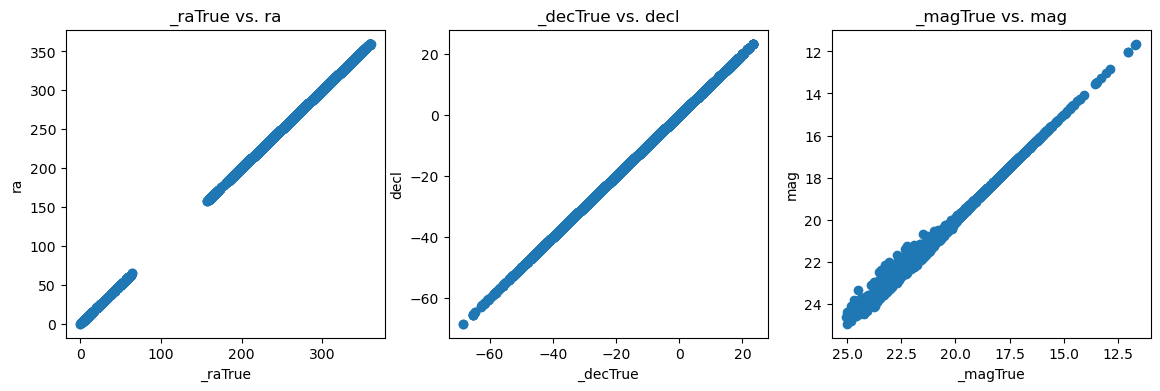

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(14,4))

ax[0].scatter(df['_raTrue'], df['ra'])
ax[0].set_xlabel('_raTrue')
ax[0].set_ylabel('ra')
ax[0].set_title('_raTrue vs. ra')

ax[1].scatter(df['_decTrue'], df['decl'])
ax[1].set_xlabel('_decTrue')
ax[1].set_ylabel('decl')
ax[1].set_title('_decTrue vs. decl')

ax[2].scatter(df['_magTrue'], df['mag'])
ax[2].set_xlabel('_magTrue')
ax[2].set_ylabel('mag')
ax[2].set_title('_magTrue vs. mag')
ax[2].invert_xaxis()
ax[2].invert_yaxis()

Text(0.5, 1.0, 'Why do lower magnitudes have higher SNR? (All filters here)')

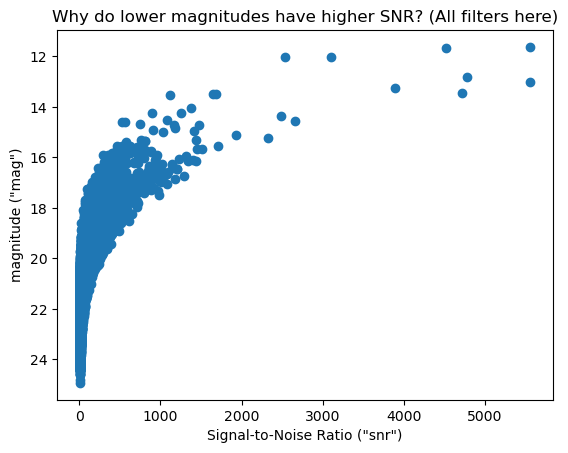

In [36]:
plt.scatter(df['snr'], (df['mag']))
plt.gca().invert_yaxis()
plt.xlabel('Signal-to-Noise Ratio ("snr")')
plt.ylabel('magnitude ("mag")')
plt.title('Why do lower magnitudes have higher SNR? (All filters here)')

#### <span style='color:blue'> Try separating the filters into separate tables.

In [37]:
filter_label = ['u', 'g', 'r', 'i', 'z', 'y']
df_u = df[(df['filter'] == 'u')] 
df_g = df[(df['filter'] == 'g')]
df_r = df[(df['filter'] == 'r')]
df_i = df[(df['filter'] == 'i')]
df_z = df[(df['filter'] == 'z')] 
df_y = df[(df['filter'] == 'y')] 

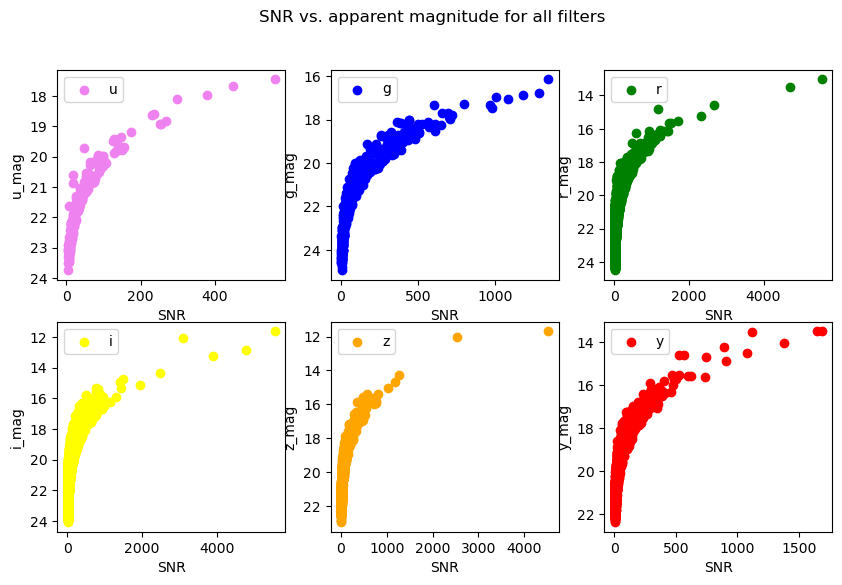

In [38]:
plot_color = ['violet', 'blue', 'green', 'yellow', 'orange', 'red'] 
fig, ax, = plt.subplots(2, 3, figsize=(10,6))
m = 0
ax[0,0].scatter(df_u['snr'], df_u['mag'], color = plot_color[0], label='u')
ax[0,1].scatter(df_g['snr'], df_g['mag'], color = plot_color[1], label='g')
ax[0,2].scatter(df_r['snr'], df_r['mag'], color = plot_color[2], label='r')
ax[1,0].scatter(df_i['snr'], df_i['mag'], color = plot_color[3], label='i')
ax[1,1].scatter(df_z['snr'], df_z['mag'], color = plot_color[4], label='z')
ax[1,2].scatter(df_y['snr'], df_y['mag'], color = plot_color[5], label='y')
fig.suptitle('SNR vs. apparent magnitude for all filters')
for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel('SNR')
        ax[i,j].set_ylabel(filter_label[m] + '_mag')
        ax[i,j].invert_yaxis()
        ax[i,j].legend()
        m += 1

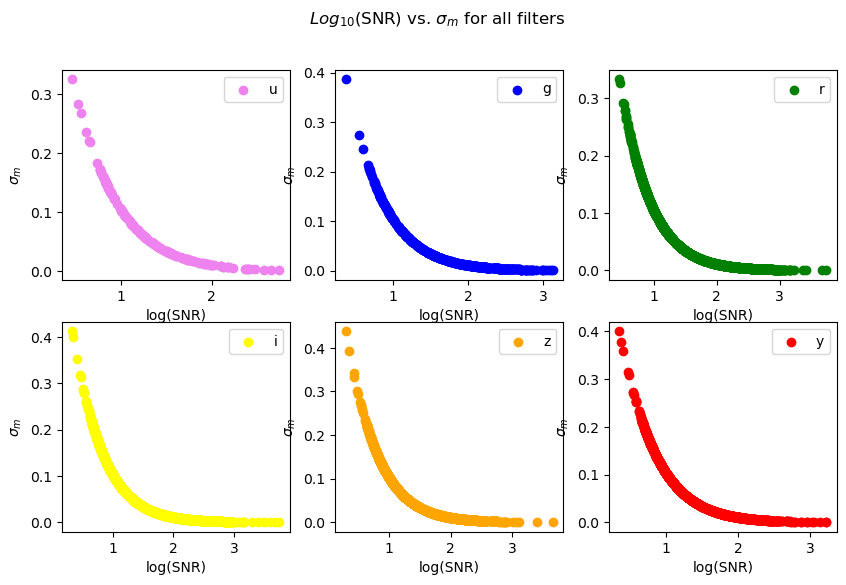

In [39]:
fig, ax, = plt.subplots(2, 3, figsize=(10,6))

ax[0,0].scatter(np.log10(df_u['snr']), df_u['magSigma'], color = plot_color[0], label='u')
ax[0,1].scatter(np.log10(df_g['snr']), df_g['magSigma'], color = plot_color[1], label='g')
ax[0,2].scatter(np.log10(df_r['snr']), df_r['magSigma'], color = plot_color[2], label='r')
ax[1,0].scatter(np.log10(df_i['snr']), df_i['magSigma'], color = plot_color[3], label='i')
ax[1,1].scatter(np.log10(df_z['snr']), df_z['magSigma'], color = plot_color[4], label='z')
ax[1,2].scatter(np.log10(df_y['snr']), df_y['magSigma'], color = plot_color[5], label='y')
fig.suptitle('$Log_{10}$(SNR) vs. ${\sigma}_{m}$ for all filters')
for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel('log(SNR)')
        ax[i,j].set_ylabel('${\sigma}_{m}$')
        
        ax[i,j].legend()


#### <span style='color:blue'> The 'magnitude column encompasses all colors (there's a separate 'filter' column) and, as shown below, the number of observations varies for each filter. I think color calculations would focus on ssObjectId. How do we calculate colors for objects? How many observations in how many filters? </span>

In [40]:
print("There are %d unique ssObjectId's out of %d objects" %(len(np.unique(df['ssObjectId'])), len(df)))

There are 5973 unique ssObjectId's out of 10000 objects


In [41]:
df = df.sort_values(by=['ssObjectId'])
df = df.reset_index()

In [42]:
for i in range(37,56):
    print(i, df['ssObjectId'][i], df['mag'][i], df['midPointTai'][i]-60000.)

37 -9154243313361666897 20.830948 3421.3408879102135
38 -9151884868867417891 22.249104 3421.3587742357995
39 -9138668375760846028 21.568453 3425.986631790016
40 -9135809738265619460 23.423765 3420.201105366614
41 -9135809738265619460 23.34846 3420.225799203101
42 -9132799761468659034 20.935024 3427.2468230595987
43 -9132799761468659034 20.816713 3427.2698756530954
44 -9125740991357390963 22.310785 3428.430552412072
45 -9125132370845439716 19.998003 3433.258091315234
46 -9125132370845439716 20.054844 3433.280849594128
47 -9124090096622738890 19.912954 3433.1630348344115
48 -9124090096622738890 19.863258 3433.1387093342637
49 -9121448729438212674 22.211996 3434.0738594415234
50 -9119969746178843911 21.11961 3421.295331308429
51 -9119969746178843911 21.028946 3421.3192588789534
52 -9114901476807406489 16.019997 3430.98120713151
53 -9110734410561767005 21.775269 3430.3057736369665
54 -9110734410561767005 21.679579 3430.329555497883
55 -9110041204458912482 23.024 3425.9875325080066


#### <span style='color:blue'> ssObjectId is the moving object identifier, but how should we calculate colors? </span>

In [43]:
print('# of Entries for each filter:')
print(' u   g   r    i   z   y')
print(len(df_u), len(df_g), len(df_r), len(df_i), len(df_z), len(df_y))

# of Entries for each filter:
 u   g   r    i   z   y
172 499 2605 2899 1900 1925
